In [1]:
mydata <- read.csv(file.choose())
ls()

[1] "mydata"

In [2]:
head(mydata)
str(mydata)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,120,0.000000000,0,0.000000000,0.000000000,0,0.000000000,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
2,132,0.006379585,0,0.006379585,0.003189793,0,0.000000000,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
3,133,0.003322259,0,0.008305648,0.003322259,0,0.000000000,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
4,134,0.002560819,0,0.007682458,0.002560819,0,0.000000000,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
5,132,0.006514658,0,0.008143322,0.000000000,0,0.000000000,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1
6,134,0.001049318,0,0.010493179,0.009443861,0,0.002098636,26,5.9,0,...,50,200,5,3,76,107,107,170,0,3


'data.frame':	2126 obs. of  22 variables:
 $ LB      : int  120 132 133 134 132 134 134 122 122 122 ...
 $ AC      : num  0 0.00638 0.00332 0.00256 0.00651 ...
 $ FM      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ UC      : num  0 0.00638 0.00831 0.00768 0.00814 ...
 $ DL      : num  0 0.00319 0.00332 0.00256 0 ...
 $ DS      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DP      : num  0 0 0 0 0 ...
 $ ASTV    : int  73 17 16 16 16 26 29 83 84 86 ...
 $ MSTV    : num  0.5 2.1 2.1 2.4 2.4 5.9 6.3 0.5 0.5 0.3 ...
 $ ALTV    : int  43 0 0 0 0 0 0 6 5 6 ...
 $ MLTV    : num  2.4 10.4 13.4 23 19.9 0 0 15.6 13.6 10.6 ...
 $ Width   : int  64 130 130 117 117 150 150 68 68 68 ...
 $ Min     : int  62 68 68 53 53 50 50 62 62 62 ...
 $ Max     : int  126 198 198 170 170 200 200 130 130 130 ...
 $ Nmax    : int  2 6 5 11 9 5 6 0 0 1 ...
 $ Nzeros  : int  0 1 1 0 0 3 3 0 0 0 ...
 $ Mode    : int  120 141 141 137 137 76 71 122 122 122 ...
 $ Mean    : int  137 136 135 134 136 107 107 122 122 122 ...
 $ Median  : int  1

In [3]:
mydata$NSP <- as.factor(mydata$NSP) # convert the NSP into factor level
str(mydata$NSP)

 Factor w/ 3 levels "1","2","3": 2 1 1 1 1 3 3 3 3 3 ...


In [4]:
# feature selection
X <- mydata[,c(1:3)]
head(X)

,LB,AC,FM
,<int>,<dbl>,<dbl>
1,120,0.000000000,0
2,132,0.006379585,0
3,133,0.003322259,0
4,134,0.002560819,0
5,132,0.006514658,0
6,134,0.001049318,0


In [5]:
# Partition data into training and TEST/validation datasets
set.seed(100)
# Sample.split(dataset,training set ratio)
pred <- sample(2, nrow(mydata), replace = TRUE, prob = c(0.7,0.3))
print(pred)
train <- mydata[pred == 1,] # all rows in pre column where value is 1
test <- mydata[pred == 2,] # all rows in pre column where value is 2

   [1] 1 1 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 2 1 2 1 2 1
  [38] 1 2 1 1 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2
  [75] 1 1 2 2 2 1 1 1 2 2 1 1 2 1 1 2 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 2
 [112] 2 1 1 2 1 2 2 1 2 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1
 [149] 1 1 1 2 1 1 1 2 2 2 1 1 2 1 1 1 1 1 1 2 2 2 1 1 1 2 2 1 2 1 1 1 1 2 2 1 1
 [186] 1 1 1 1 2 2 1 1 2 1 1 1 1 1 2 1 2 2 2 1 2 2 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1
 [223] 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 2 1 2 1 2 1 1 1 1 1 2 1 1 2 2 1 1 1
 [260] 2 1 2 1 2 2 2 1 1 2 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 [297] 1 2 1 1 2 1 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1 1 1 2 1 2 2 1 1 2 1 1 1
 [334] 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 2 2
 [371] 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1
 [408] 2 2 1 1 1 1 2 1 2 1 2 1 2 2 1 2 2 1 1 1 2 1 1 2 1 1 1 1 2 2 2 1 2 1 1 1 1
 [445] 1 2 1 1 1 1 1 1 2 2 1

In [ ]:
# Install party package for ctree function
library(party)
install.packages('party')


	 Conditional inference tree with 11 terminal nodes

Response:  NSP 
Inputs:  LB, AC, FM 
Number of observations:  1464 

1) AC <= 0.000823723; criterion = 1, statistic = 227.377
  2) LB <= 136; criterion = 1, statistic = 118.546
    3) FM <= 0.1351126; criterion = 1, statistic = 23.692
      4)*  weights = 341 
    3) FM > 0.1351126
      5)*  weights = 8 
  2) LB > 136
    6)*  weights = 282 
1) AC > 0.000823723
  7) LB <= 110; criterion = 1, statistic = 40.656
    8)*  weights = 14 
  7) LB > 110
    9) AC <= 0.002053388; criterion = 1, statistic = 38.828
      10) LB <= 147; criterion = 1, statistic = 20.751
        11) FM <= 0.008340284; criterion = 0.996, statistic = 13.216
          12)*  weights = 126 
        11) FM > 0.008340284
          13)*  weights = 10 
      10) LB > 147
        14)*  weights = 12 
    9) AC > 0.002053388
      15) AC <= 0.002923977; criterion = 0.987, statistic = 10.866
        16) LB <= 144; criterion = 0.98, statistic = 7.371
          17)*  weights

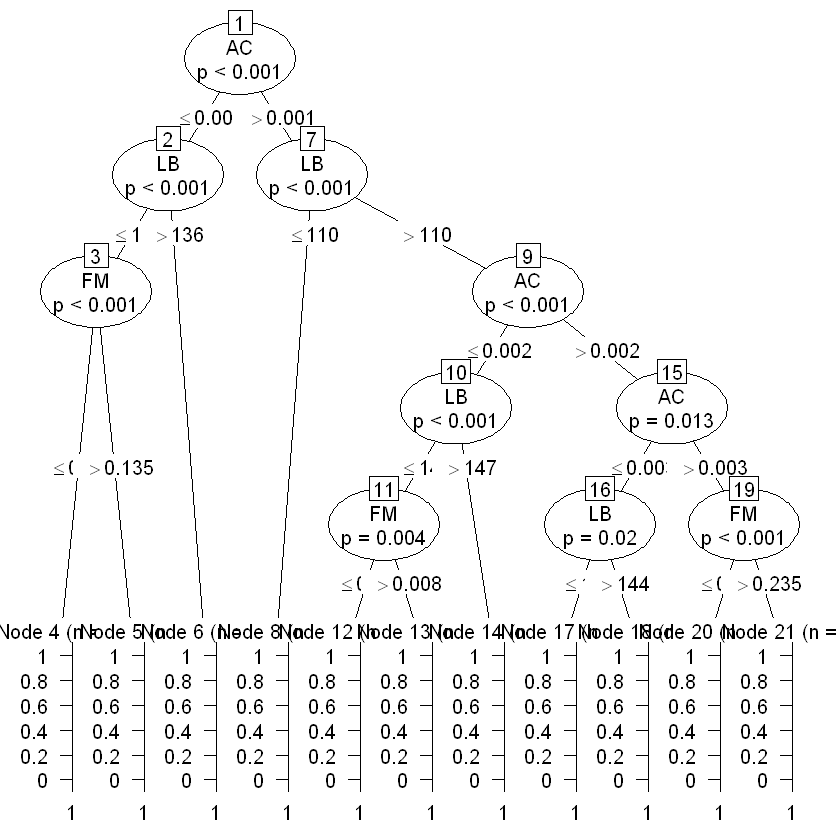

In [7]:
# ctree(Y ~ X, dataset, controls = ctree_control(mincriterion & minsplit))
mytree1 <- ctree(NSP ~ LB + AC + FM, data = train, controls = ctree_control(mincriterion = 0.9, minsplit = 50))
print(mytree1)
plot(mytree1)

[[1]]
[1] 0.89473684 0.04210526 0.06315789

[[2]]
[1] 0.500000000 0.009090909 0.490909091

[[3]]
[1] 0.89473684 0.04210526 0.06315789

[[4]]
[1] 0.986332574 0.009111617 0.004555809

[[5]]
[1] 0.0952381 0.0000000 0.9047619

[[6]]
[1] 0.0952381 0.0000000 0.9047619

[[1]]
[1] 0.50000000 0.44444444 0.05555556

[[2]]
[1] 0.84615385 0.10989011 0.04395604

[[3]]
[1] 0.500000000 0.009090909 0.490909091

[[4]]
[1] 0.500000000 0.009090909 0.490909091

[[5]]
[1] 0.0952381 0.0000000 0.9047619

[[6]]
[1] 0.21428571 0.75000000 0.03571429

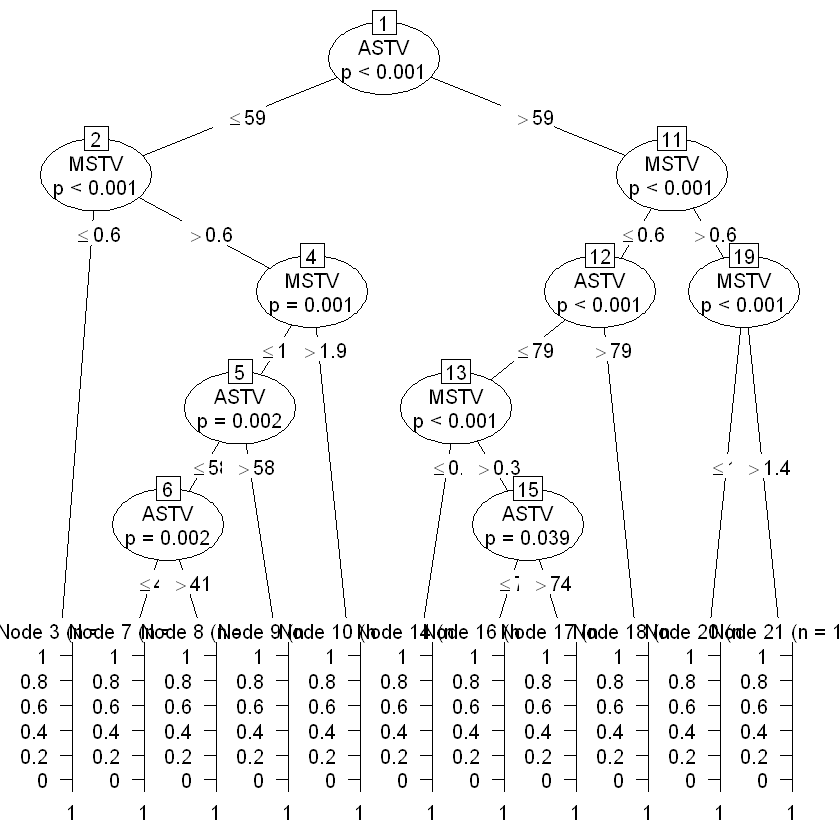

In [10]:
mytree2 <- ctree(NSP ~ ASTV + MSTV, data = train, controls = ctree_control(mincriterion = 0.9, minsplit = 50))
plot(mytree2)
mytree2_predict = predict(mytree2, test, type="prob") # Prediction on mytree2
head(mytree2_predict)
tail(mytree2_predict)

           
testmisclas   1   2   3
          1 470  36  41
          2  40  60  12
          3   0   0   3


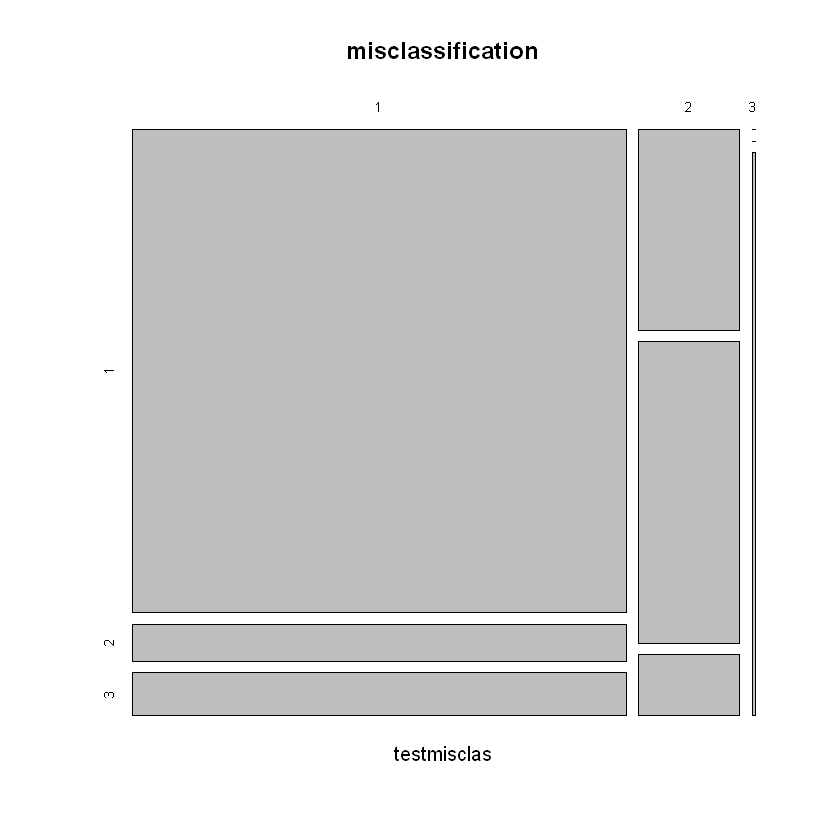

In [11]:
# Misclassification error with test set
testmisclas <- predict(mytree1, newdata = test) # predict(model_variable,testset)
misclassification <- table(testmisclas, test$NSP)
print(misclassification)
plot(misclassification)

In [12]:
# Accuracy calculation
Accuracy <- sum(diag(misclassification))/sum(misclassification)
Accuracy
Error<-1-Accuracy
Error

[1] 0.805136

[1] 0.194864